# PROJECT - FINDING BEST DATA SCIENCE COURSES THROUGH WEBSCRAPING WITH EDA AND DATA VISUALIZATION USING PYTHON

                        IMPORTING BASIC PACKAGES AND SETTING UP CHROME DRIVER

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot

In [2]:
pip install webdriver_manager --user

Note: you may need to restart the kernel to use updated packages.


In [3]:
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Current google-chrome version is 92.0.4515
[WDM] - Get LATEST driver version for 92.0.4515


[WDM] - Get LATEST driver version for 92.0.4515
[WDM] - Trying to download new driver from http://chromedriver.storage.googleapis.com/92.0.4515.107/chromedriver_win32.zip
[WDM] - Driver has been saved in cache [C:\Users\HELLO\.wdm\drivers\chromedriver\win32\92.0.4515.107]


In [4]:
driver.get('https://www.classcentral.com/subject/data-science')

                                SCRAPING DATA SCIENCE COURSES

In [5]:
content = driver.page_source
soup = BeautifulSoup(content)

In [6]:
def find_2nd(string, substring):
    return string.find(substring, string.find(substring) + 1)
def find_1st(string, substring):
    return string.find(substring)
# string.find(substring)

In [7]:
# NAME OF COURSE
Course = []
for i in soup.findAll("span",{'class' : 'text-1 weight-semi line-tight'}):
    b = str(i) 
#     print(b[find_1st(b,'>')+1:find_2nd(b,'<')])
    Cor = b[find_1st(b,'>')+1:find_2nd(b,'<')]
    if Cor is not None:
        Course.append(Cor)
    else:
        Course.append('-1')
    
    
course = []
for i in Course:
    i = i.strip()
#     print(i)
    course.append(i)

In [8]:
# NAME OF INSTITUTE


ins = []
for i in soup.findAll('div', attrs={'class':'truncate'}):
    abc = i.find('a', attrs={'class':'color-charcoal small-down-text-2 text-3'})
    if abc is not None:
        ins.append(abc.text)
#     else:
#         ins.append('-1')
            
newIns = []
for i in ins:
    i = i.strip()
    newIns.append(i)


In [9]:
# NAME OF PROVIDER

provider = []
for i in soup.findAll("a",{'class' : 'color-charcoal italic'}):
#     print(i.text)
    if i is not None:
        provider.append(i.text)
    else:
        provider.append('-1')
        
        
providers = []
for i in provider:
    i = i.strip()
    providers.append(i)

In [10]:
# RATING

rating =[]
for i in soup.findAll('div', attrs = {'class' : 'col border-box text-center nowrap row large-up-text-right padding-horz-small push'}):
    rat = i.find("span",{'class' : 'xlarge-up-hidden color-charcoal text-center'})
#     print(rat.text)
    if rat is not None:
        rating.append(rat.text)
    else:
        rating.append('-1')

Rating = []        
for i in rating:
    i = i.strip()
    #print(i)
    Rating.append(i)

In [11]:
newIns

['Johns Hopkins University',
 'Johns Hopkins University',
 'University of California, Davis',
 'Johns Hopkins University',
 'University of Michigan',
 'Massachusetts Institute of Technology',
 'Kaggle',
 'Johns Hopkins University',
 'University of California, San Diego',
 'Johns Hopkins University',
 'University of California, San Diego',
 'Johns Hopkins University',
 'Johns Hopkins University',
 'Duke University',
 'Johns Hopkins University',
 'University of California, San Diego',
 'Massachusetts Institute of Technology',
 'Stanford University',
 'Massachusetts Institute of Technology',
 'University of Illinois at Urbana-Champaign',
 'Harvard University',
 'Indian Institute of Technology Madras',
 'Esri',
 'Johns Hopkins University',
 'University of Illinois at Urbana-Champaign',
 'University of Illinois at Urbana-Champaign',
 'University of California, San Diego',
 'Universidad Anáhuac',
 'Johns Hopkins University',
 'Technical University of Denmark (DTU)',
 'The University of Sheff

In [12]:
# NUMBER OF REVIEWS

review =[]
for i in soup.findAll('div', attrs = {'class' : 'col border-box text-center nowrap row large-up-text-right padding-horz-small push'}):
    rev = i.find("span",{'class' : 'large-down-hidden block line-tight text-4 color-gray'})
#     print(rev)
    if rev is not None:
        review.append(rev.text)
    else:
        review.append('-1')

reviews = []        
for i in review:
    i = i.strip()
    #print(i)
    reviews.append(i)

In [13]:
DS = pd.DataFrame({'Course Name':course, 'Institute':newIns, 'Offered By':providers, 'Rating': Rating, 'No_of_Reviews':reviews})

In [21]:
DS

,Course Name,Institute,Offered By,Rating,No_of_Reviews
0,R Programming,Johns Hopkins University,Coursera,2.8,245 Reviews
1,The Data Scientist’s Toolbox,Johns Hopkins University,Coursera,3.3,166 Reviews
2,Computational Social Science,"University of California, Davis",Coursera,4.8,83 Reviews
3,Getting and Cleaning Data,Johns Hopkins University,Coursera,3.5,57 Reviews
4,Introduction to Data Science in Python,University of Michigan,Coursera,2.4,46 Reviews
5,The Analytics Edge,Massachusetts Institute of Technology,edX,4.7,80 Reviews
6,Become a Data Analyst,Kaggle,Udacity,4.5,66 Reviews
7,Statistical Inference,Johns Hopkins University,Coursera,2.8,34 Reviews
8,Introduction to Big Data,"University of California, San Diego",Coursera,2.7,35 Reviews
9,Regression Models,Johns Hopkins University,Coursera,2.5,33 Reviews


                                    EXPLORATORY DATA ANALYSIS

In [23]:
# MEAN RATUING OF COURSES

DS['Rating'] = DS['Rating'].astype(float)
dfRating = DS.dropna()
dfRating = dfRating[dfRating.Rating != -1]
dfRating['Rating'].mean()
# mean rating is 3.633

3.610416666666667

In [24]:
# AVERAGE NO OF REVIEWS

dfRating['No_of_Reviews'] = dfRating['No_of_Reviews'].str.strip(" Reviews")
dfRating['No_of_Reviews'].astype(int).mean()
# avg no of reviews are 33.66

dfRating['No_of_Reviews'] = dfRating['No_of_Reviews'].astype(float)

In [25]:
# HIGHEST RATED COURSES

best_rated = dfRating.loc[ (dfRating['Rating'] >= 4) & 
                      (dfRating['No_of_Reviews'] >= 20)]
best_rated

,Course Name,Institute,Offered By,Rating,No_of_Reviews
2,Computational Social Science,"University of California, Davis",Coursera,4.8,83.0
5,The Analytics Edge,Massachusetts Institute of Technology,edX,4.7,80.0
6,Become a Data Analyst,Kaggle,Udacity,4.5,66.0
10,Python for Data Science,"University of California, San Diego",edX,4.4,47.0
16,Probability - The Science of Uncertainty and Data,Massachusetts Institute of Technology,edX,4.9,32.0
17,Mining Massive Datasets,Stanford University,edX,4.6,25.0
18,Introduction to Computational Thinking and Dat...,Massachusetts Institute of Technology,edX,4.5,31.0
19,Digital Marketing Analytics in Practice,University of Illinois at Urbana-Champaign,Coursera,4.2,24.0
21,Python for Data Science,Indian Institute of Technology Madras,Swayam,4.4,42.0
22,Spatial Data Science: The New Frontier in Anal...,Esri,Independent,5.0,41.0


In [27]:
dfRating

,Course Name,Institute,Offered By,Rating,No_of_Reviews
0,R Programming,Johns Hopkins University,Coursera,2.8,245.0
1,The Data Scientist’s Toolbox,Johns Hopkins University,Coursera,3.3,166.0
2,Computational Social Science,"University of California, Davis",Coursera,4.8,83.0
3,Getting and Cleaning Data,Johns Hopkins University,Coursera,3.5,57.0
4,Introduction to Data Science in Python,University of Michigan,Coursera,2.4,46.0
5,The Analytics Edge,Massachusetts Institute of Technology,edX,4.7,80.0
6,Become a Data Analyst,Kaggle,Udacity,4.5,66.0
7,Statistical Inference,Johns Hopkins University,Coursera,2.8,34.0
8,Introduction to Big Data,"University of California, San Diego",Coursera,2.7,35.0
9,Regression Models,Johns Hopkins University,Coursera,2.5,33.0


In [28]:
# INSTITUTE WITH MAXIMUM COURSES (Top 3)

dfRating['Institute'].value_counts()[:3]

Johns Hopkins University                      15
University of California, San Diego            7
University of Illinois at Urbana-Champaign     4
Name: Institute, dtype: int64

In [29]:
# PLATFORM HAVING MAXIMUM COURSES 

dfRating['Offered By'].value_counts()

Coursera       33
edX            11
Independent     1
Udacity         1
Swayam          1
FutureLearn     1
Name: Offered By, dtype: int64

                                           VISUALIZATION

In [30]:
import matplotlib.pyplot 
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [31]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [32]:
import chart_studio
username = 'madhavkhurana1005' # your username
api_key = 'p2zKEhNnVP6GPumIOXJa' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [48]:
dfRating

,Course Name,Institute,Offered By,Rating,No_of_Reviews
0,R Programming,Johns Hopkins University,Coursera,2.8,245.0
1,The Data Scientist’s Toolbox,Johns Hopkins University,Coursera,3.3,166.0
2,Computational Social Science,"University of California, Davis",Coursera,4.8,83.0
3,Getting and Cleaning Data,Johns Hopkins University,Coursera,3.5,57.0
4,Introduction to Data Science in Python,University of Michigan,Coursera,2.4,46.0
5,The Analytics Edge,Massachusetts Institute of Technology,edX,4.7,80.0
6,Become a Data Analyst,Kaggle,Udacity,4.5,66.0
7,Statistical Inference,Johns Hopkins University,Coursera,2.8,34.0
8,Introduction to Big Data,"University of California, San Diego",Coursera,2.7,35.0
9,Regression Models,Johns Hopkins University,Coursera,2.5,33.0


Text(0, 0.5, 'Total Courses')

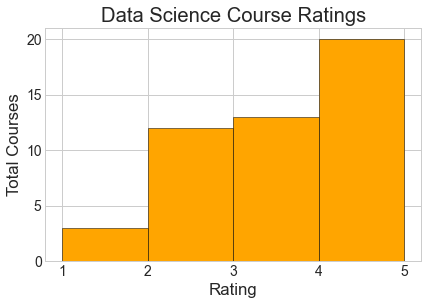

In [177]:
# Ratings with Total Courses 

bins = [1, 2, 3, 4, 5]
pyplot.hist(dfRating['Rating'], bins = bins, color = 'orange', edgecolor = 'black')
pyplot.title('Data Science Course Ratings')
pyplot.xlabel('Rating')
pyplot.ylabel('Total Courses')

Text(0, 0.5, 'Total Courses')

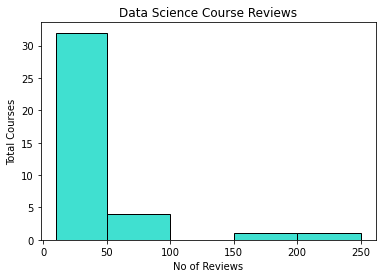

In [57]:
# Num of Reviews - AllCourses

bins = [10, 50, 100, 150, 200, 250]
pyplot.hist(dfRating['No_of_Reviews'], bins = bins, color = 'turquoise', edgecolor = 'black')
pyplot.title('Data Science Course Reviews')
pyplot.xlabel('No of Reviews')
pyplot.ylabel('Total Courses')

In [151]:
# Best Courses - Highest Rated:

bestRated = dfRating.loc[(dfRating['No_of_Reviews'] >= 20) & 
                         (dfRating['Rating'] >= 4.5)]

dfInstitute = bestRated['Institute'].value_counts()

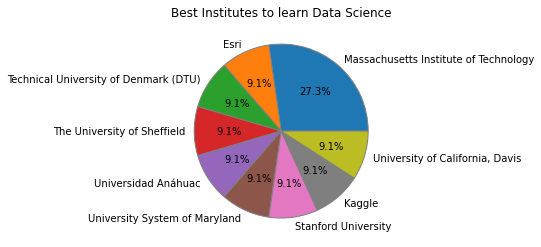

In [104]:
# Best Rated Courses offered by:


pyplot.pie(np.array(dfInstitute), labels = dfInstitute.index, autopct = '%1.1f%%', wedgeprops = {'edgecolor' : 'grey'})
pyplot.title('Best Institutes to learn Data Science')
pyplot.show()

Text(0, 0.5, 'Total Courses')

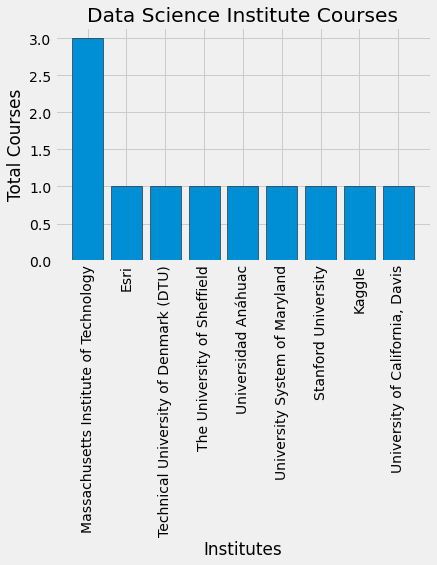

In [170]:
# Total Courses offered by Institutes

pyplot.style.use('fivethirtyeight')

Inst = dfInstitute.index
Inst_no = np.array(dfInstitute)

pyplot.bar(Inst,Inst_no, edgecolor = 'black')
pyplot.title('Data Science Institute Courses')
pyplot.xlabel('Institutes')
pyplot.xticks(rotation=90)
pyplot.ylabel('Total Courses')

In [153]:
# some data corrections

bestRated.loc[29,'Course Name'] = 'Python for Data Science edX'
bestRated.loc[22,'Course Name'] = 'Python for Data Science Swayam'

In [171]:
print(pyplot.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0, 0.5, 'Intitute Name')

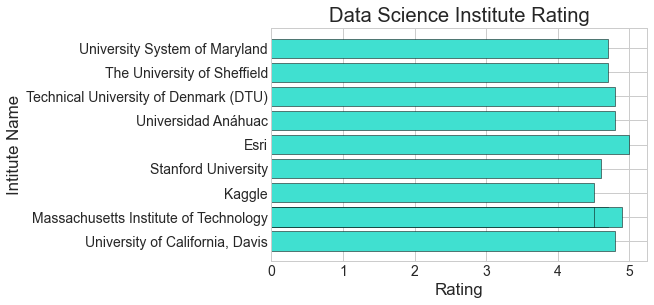

In [174]:
# Best Institutes with Ratings

pyplot.style.use('seaborn-whitegrid')

x = bestRated['Institute']
y = bestRated['Rating']
pyplot.barh(x,y,edgecolor = 'black',color = 'turquoise')
pyplot.title('Data Science Institute Rating')
pyplot.xlabel('Rating')
pyplot.ylabel('Intitute Name')

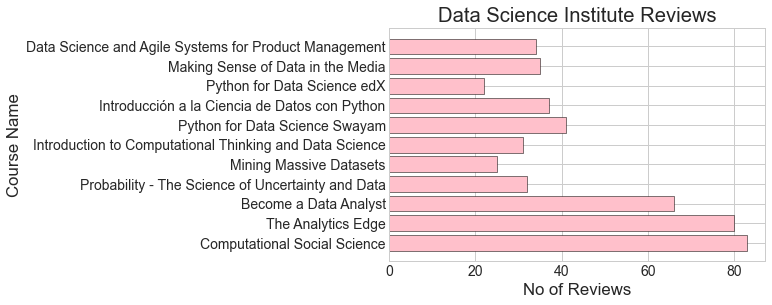

In [178]:
# Best Courses & No of Reviews

x = bestRated['Course Name']
y = bestRated['No_of_Reviews']
pyplot.barh( x, y, edgecolor = 'black', color = 'pink')
pyplot.title('Data Science Institute Reviews')
pyplot.xlabel('No of Reviews')
pyplot.ylabel('Course Name')
pyplot.show()

                                        THE END! THANK YOU!